In [83]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#<font size="20+"> <font color="blue"> **Violin plot**</font>

**¿Qué es un Violin plot?**

Un gráfico de violin mezcla dos tipos de gráficos: los boxplots y los gráficos de densidad.

**¿Por qué deberiamos utilizar un gráfico de violin?**

Anteriormente, aprendimos que los boxplot son gráficos sencillos y convenientes para comparar varios grupos en un mismo gráfico, en términos de sus cuantiles. Sin embargo, estos gráficos no nos permiten ver facilmente comportamientos como la bimodalidad o la multimodalidad. 

Por otro lado, los gráficos de densidad nos permiten observar propiedades distribucionales de los datos, pero no son muy convenientes para comparar muchos grupos a la vez.

Los gráficos de violín son un híbrido entre un gráfico de boxplot y uno de densidad, que nos permiten quedarnos con lo mejor de ambos gráficos.



# **Gráficos de violin** 
Cargaremos la base de datos TIPS

In [84]:
import seaborn as sns
  
seaborn.set(style="whitegrid") 
  
tips = sns.load_dataset("tips") 
  

In [85]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Obtenemos un gráfico de densidad para nuestros datos totall Bill

In [86]:
# K: 1 + 3.3 Log10(n) = 6,28  Regla de sturges para n > 30, sino raiz(n)
k = 1 + 3.3* np.log10(240)
print(k)

8.854697097648298


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

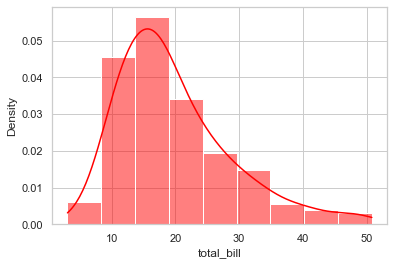

In [87]:
sns.histplot(data=tips, x=tips["total_bill"], bins=9, color="red", stat="density", alpha=0.5, kde=True)

generamos el boxplot de TotalBill

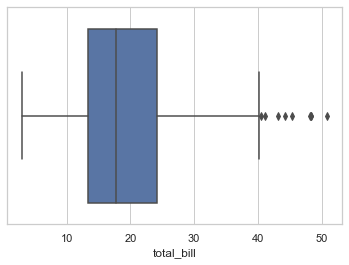

In [88]:
ax = sns.boxplot(x=tips["total_bill"])

##<font color="teal">**Nuestro primer gráfico de violin**</font> 
Un gráfico de violín es la combinación de ámbos gráficos. La versión básica de un gráfico de violin se genera usando el siguiente código.

Generamos el grafico de violin pata Totall Bill

<AxesSubplot:xlabel='total_bill'>

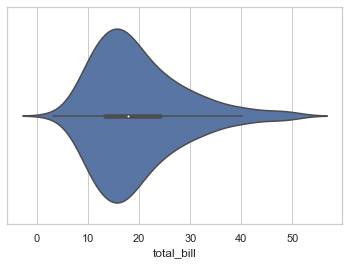

In [89]:
seaborn.violinplot(x=tips["total_bill"])

##<font color="teal">**Explicación del gráfico de violin**</font> 
* Un gráfico de violín combinado con un boxplot mantiene todas las explicaciones de un boxplot.
* Las partes **más anchas** del gráfico de violín se refieren a zonas de alta probabilidad, es decir, donde hay una mayor frecuencia de datos.
* Las zonas **angostas** son zonas de baja probabilidad, donde vemos una menor frecuencia de datos.

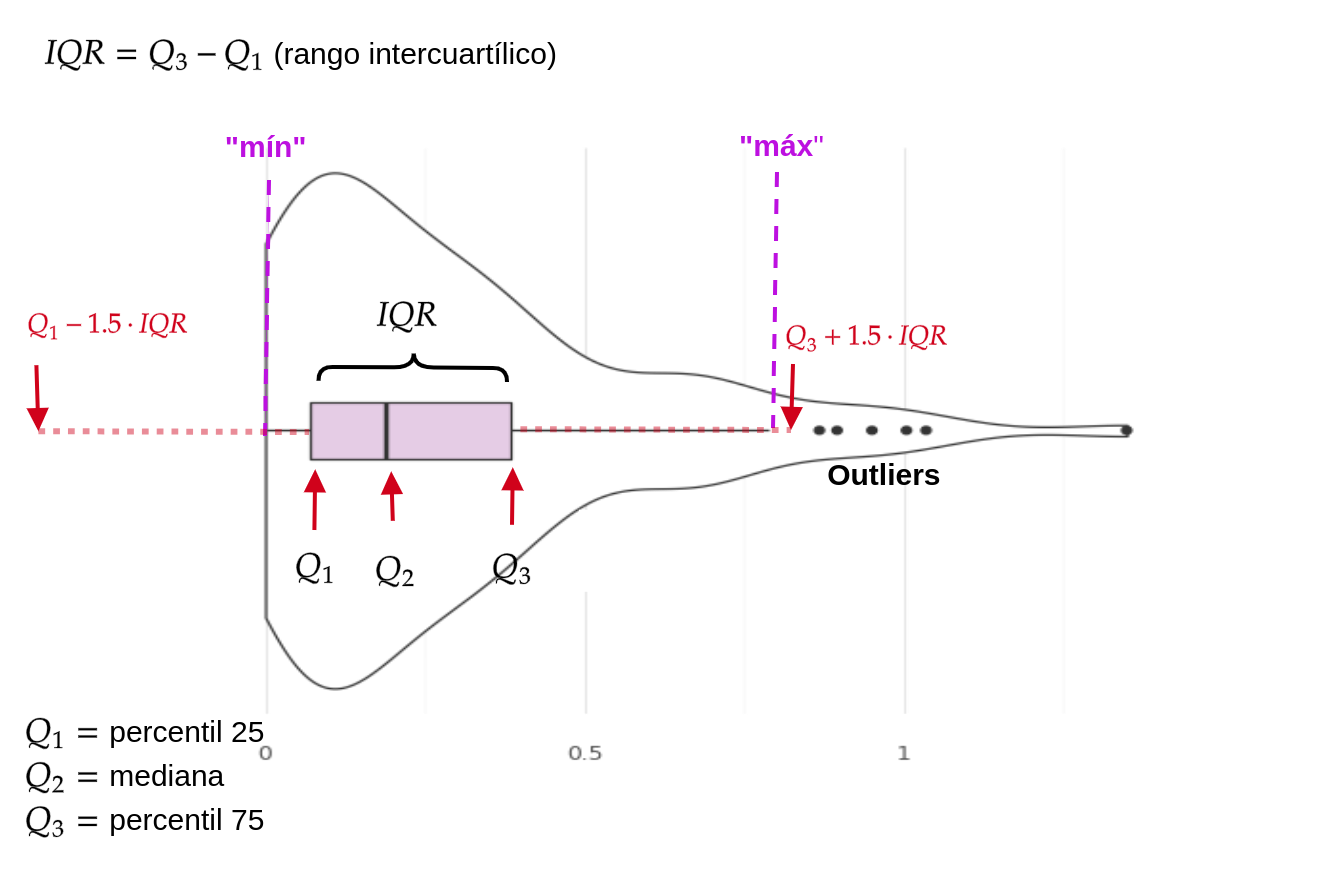

### **Los gráficos de violin nos permiter observar propiedades distribucionales como la Bimodalidad**

In [90]:
#Creamos datos de una mezcla de normales
np.random.seed(1)
n1=100
n2=150

d1=np.random.normal(-1,0.5,n1)
d2=np.random.normal(6,1,n2)


tipo=["T1"]*(n1+n2)
valor=np.concatenate((d1,d2))

D={"Valor":valor,"Tipo":tipo}
df=pd.DataFrame(D)
df.head()

,Valor,Tipo
0,-0.187827,T1
1,-1.305878,T1
2,-1.264086,T1
3,-1.536484,T1
4,-0.567296,T1


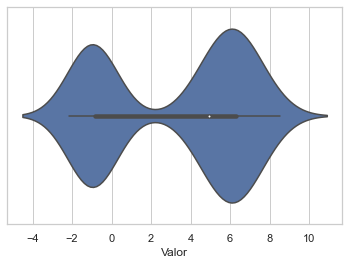

In [91]:
ax = seaborn.violinplot(x=df["Valor"])

Si queremos un gráfico con aún más información sobre los datos, podemos usar el comando **swarmplot()** para superponer las observaciones dentro del gráfico de violín. 

* Cuando usamos el comando sin la distribución de los puntos en el eje y (en este caso) es solo estética y no tiene significado.
* La distribución en el eje x (en este caso) nos muestra la dispersión de los datos, que se observa claramente del violin plot.
* Recuerde que menos es más.

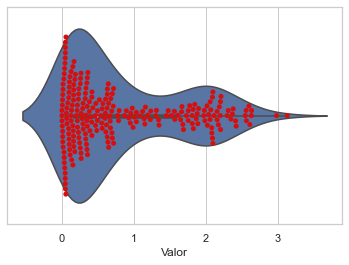

In [94]:
ax = sns.violinplot(x=df["Valor"])
# Cambiamos el color de los puntos ingresando el valor de un color rojo en hexadecimal
ax = sns.swarmplot(x=df["Valor"], color="#d60e0e")

##<font color="teal">**Gráficos de violin para 2 o más categorias**</font> 

Al igual que los boxplot, los gráficos de vilín nos permiten comparar fácilmente varios grupos a la vez:

In [96]:
#Creamos datos para tres grupos considerando tamaños y distribuciones diferentes
np.random.seed(1)
n1=100
n2=50
n3=90

d1=np.random.exponential(0.3,n1)
d2=np.random.normal(2,0.5,n2)
d3=np.random.gamma(1,0.7,n3)

tipo=["T1"]*n1+["T2"]*n2+["T3"]*n3
valor=np.concatenate((d1,d2,d3))

D={"Valor":valor,"Tipo":tipo}
df=pd.DataFrame(D)
df.head()

,Valor,Tipo
0,0.161882,T1
1,0.382238,T1
2,0.000034,T1
3,0.108004,T1
4,0.047613,T1


Procedemos a graficar un gráfico de violín por categoria. Note que usando la información otorgada por estos gráficos podemos darnos cuentas de propiedades distribucionales de cada grupo. 

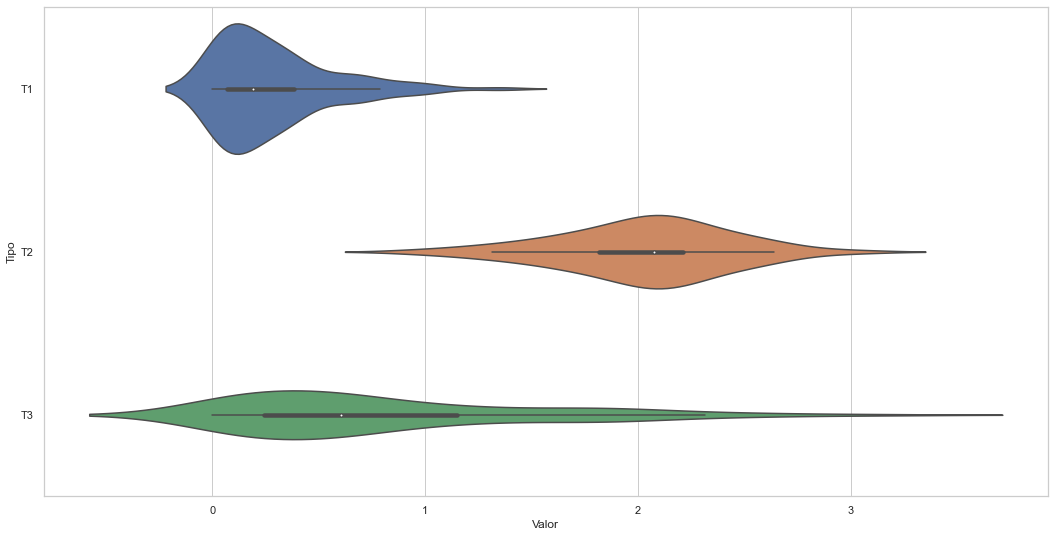

In [97]:
# Estamos cambiando el ancho que viene por defecto
plt.figure(figsize=(18,9))
ax = sns.violinplot(y=df["Tipo"], x=df["Valor"], width=0.8)

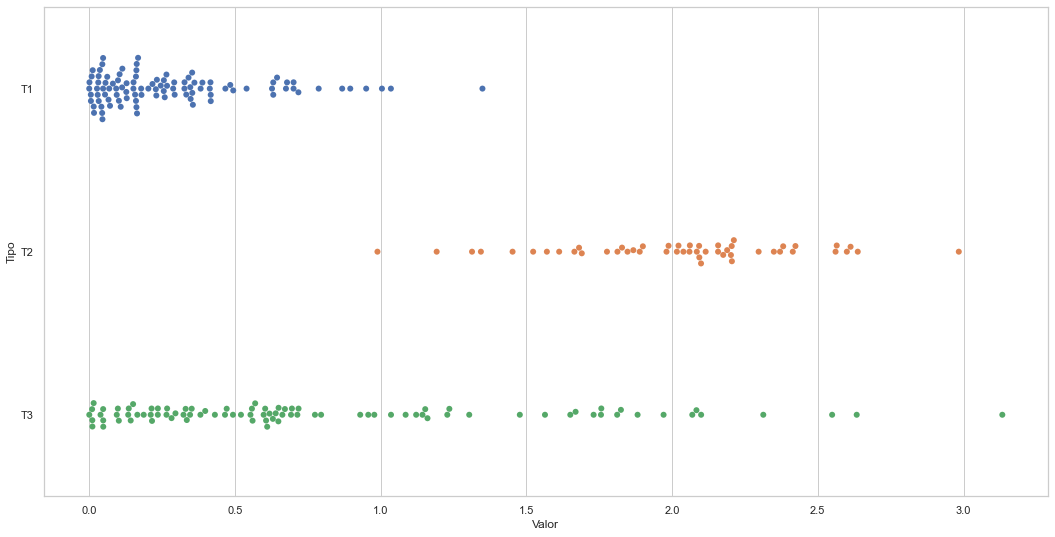

In [98]:
plt.figure(figsize=(18,9))
ax = sns.swarmplot(y=df["Tipo"], x=df["Valor"], data=tips, size=6)

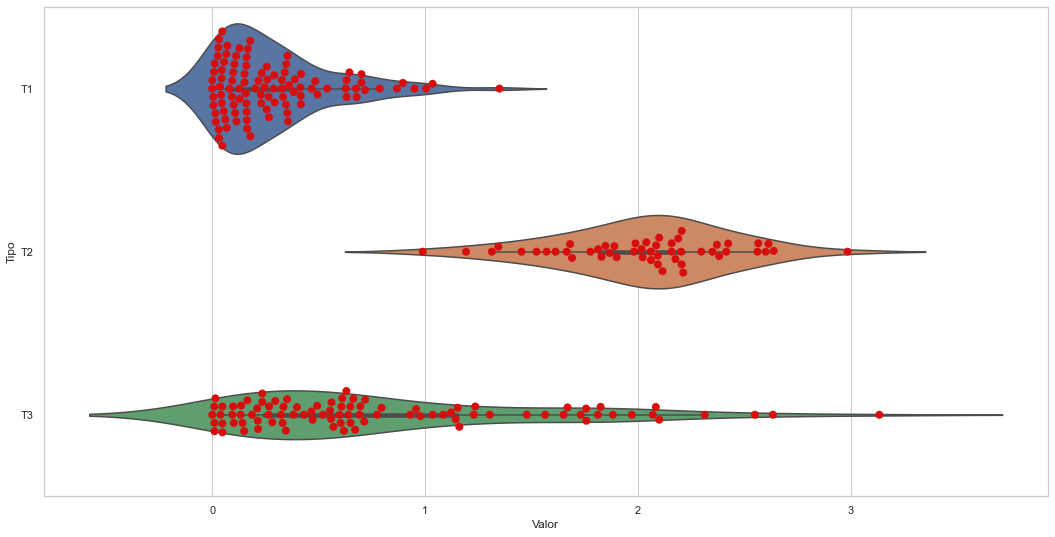

In [100]:
plt.figure(figsize=(18,9))
ax = sns.violinplot(y=df["Tipo"], x=df["Valor"], width=0.8)
ax = sns.swarmplot(y=df["Tipo"], x=df["Valor"], data=tips, size=8, color="#d60e0e")